<font size=7>Theta Waves Figure

# <font color="gray"> Setup

This is where I create the various plots used to make the alpha waves figure in the paper.

In [2]:
from human_hip.histology import plot_histology, plot_histology_electrode_map
from human_hip.spike_data import read_phy_files, read_autocurated_data
from human_hip.raw_data import  get_brain_waves, butter_filter

from matplotlib import pyplot as plt
from matplotlib.patches import Patch
import pandas as pd

import numpy as np
import pickle

In [3]:
with open("/workspaces/human_hippocampus/data/ephys_raw/2023-12-03-e-Hc112823_avv9hckcr1/acid1_start9s_stop28s_fs1ms.pkl", 'rb') as filename:
    data_raw = pickle.load(filename)
print(data_raw.keys())
print(data_raw["data"].shape)

dict_keys(['data', 'xy', 'frame_rate'])
(1009, 19000)


In [4]:
electrode_mapping = data_raw["xy"].copy()
electrode_mapping[:,1] = data_raw["xy"][:,0]/12.5
electrode_mapping[:,0] = data_raw["xy"][:,1]

In [5]:
sd = read_autocurated_data( "/workspaces/human_hippocampus/data/ephys/2023-12-03-e-Hc112823_avv9hckcr1/derived/kilosort2/Hc112823_avv9hckcr1_21841_120323_3_acqm.zip" )


In [6]:
# data_raw["xy"].shape
# data_raw["data"].shape
# data_raw["frame_rate"]
# my_electrodes = [630, 19, 656]

In [7]:
waves = get_brain_waves( data_raw["data"],fs=data_raw["frame_rate"])

## Plot Theta Waves -  <font color="green">Tals Idea

([], [])

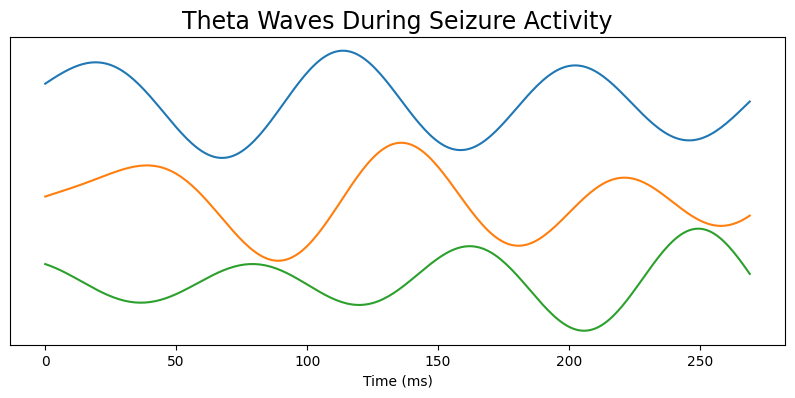

In [8]:
 plt.figure(figsize=(10,4))

x_start = 6080
x_end = 6350

plt.plot( waves["alpha"][658,x_start:x_end]+2.9, label='$e_1$' )
plt.plot( waves["alpha"][19,x_start:x_end]+1.3, label='$e_2$' )
plt.plot( waves["alpha"][515,x_start:x_end], label='$e_3$' )

# Adding a legend
#plt.legend(loc="lower right")

# Additional plot customization
plt.xlabel('Time (ms)')  # Adjust label as appropriate
#plt.ylabel(r'Amplitude ($\mu$V)')         # Adjust label as appropriate
#plt.xlim(310, 750) 
#plt.ylim(-1.1, 1) 
# add plot title with a larger font

plt.title('Theta Waves During Seizure Activity', fontsize=17)  # Optional: add a plot title
# Remove y axis
plt.yticks([])
# plt.title('Wave Intensity at Different Indexes')  # Optional: add a plot title

# plt.show()

# Plot Electrodes

Text(0.5, 1.0, 'Neuron & Electrode Layout')

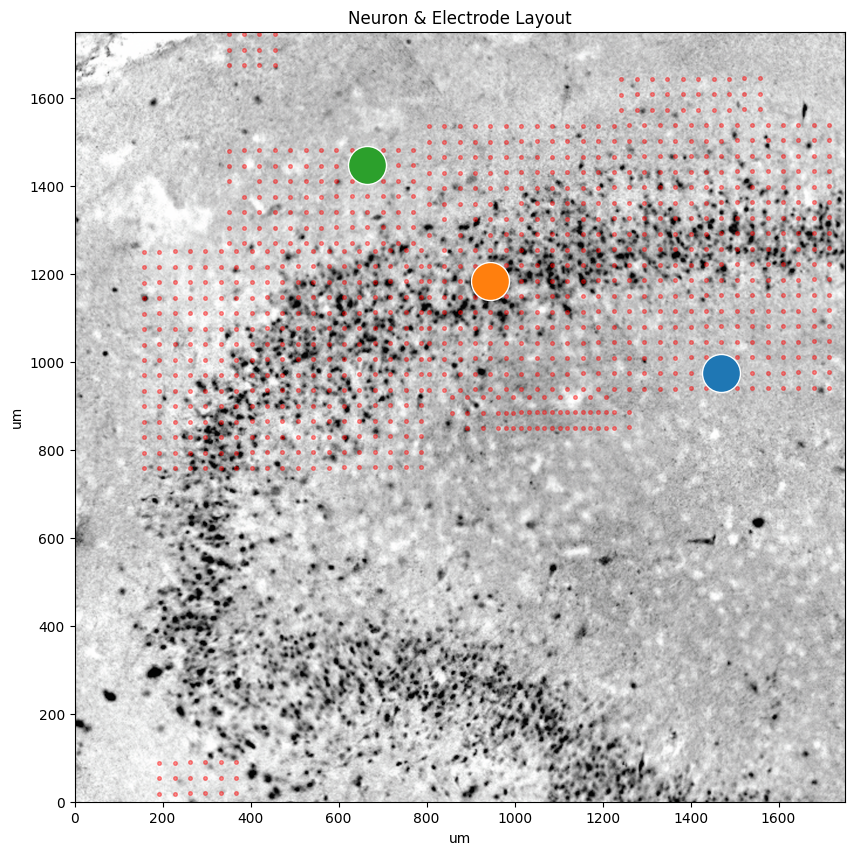

In [4]:

# Add background image
plt.figure(figsize=(15,10))       # Set image size to roughly the shape of the MEA
img = plt.imread("/workspaces/human_hippocampus/data/histology/hc112823_bw.png")      # Load in image
plt.imshow(img,  extent=[0, 3850, 0, 2100]) # Plot image, have it correspond to electrode dimensions
plt.scatter( electrode_mapping[:,0], electrode_mapping[:,1], s=7, c="red", alpha=.4) # Plot electrodes

# Add selected electrodes

plt.scatter( electrode_mapping[658,0], electrode_mapping[658,1], s=750, edgecolors='white', label='$E_1$' )
plt.scatter( electrode_mapping[19,0], electrode_mapping[19,1], s=750, edgecolors='white',  label='$E_2$' )
plt.scatter( electrode_mapping[515,0], electrode_mapping[515,1], s=750, edgecolors='white',  label='$E_3$' )

# #add legend, axises limits, labels,  and title
# #legend_elements = [Patch(facecolor=electrode_color) ]   # Create colors in legend
# #plt.legend(legend_elements, ["Electrode"])       # Add legend       
# plt.legend()
plt.xlim(0,1750)                                      # Set axis limits to that of the MEA
plt.ylim(0, 1750)
plt.xlabel('um')                                         # add axises and title
plt.ylabel('um')
plt.title(f"Neuron & Electrode Layout")
# #plt.show()  

In [5]:
plot_histology_electrode_map

<function human_hip.histology.histology.plot_histology_electrode_map(sd, electrode_mapping, image_path, electrode_color='darkorange', neuron_color='magenta', electrodes=True, neurons=True, xlim=(0, 3850), ylim=(0, 2100))>

In [6]:
waves = get_brain_waves( data_raw["data"],fs=data_raw["frame_rate"])

Text(0.5, 1.0, 'Theta Waves During Seizure Activity')

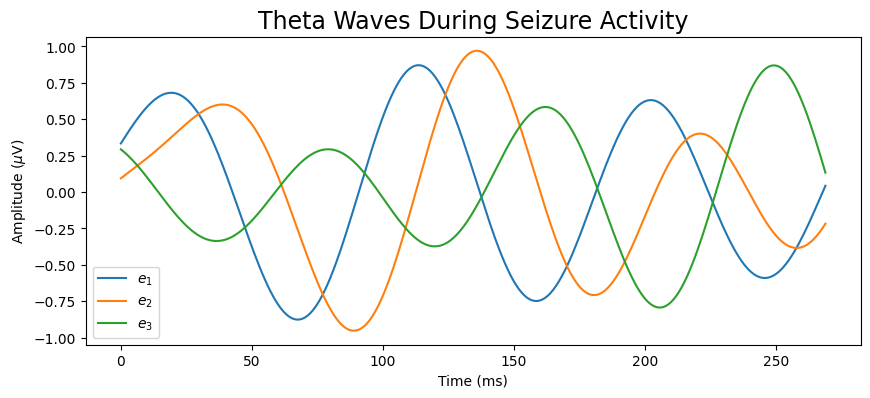

In [7]:
plt.figure(figsize=(10,4))

x_start = 6080
x_end = 6350

plt.plot( waves["alpha"][658,x_start:x_end], label='$e_1$' )
plt.plot( waves["alpha"][19,x_start:x_end], label='$e_2$' )
plt.plot( waves["alpha"][515,x_start:x_end], label='$e_3$' )

# Adding a legend
plt.legend()

# Additional plot customization
plt.xlabel('Time (ms)')  # Adjust label as appropriate
plt.ylabel(r'Amplitude ($\mu$V)')         # Adjust label as appropriate
#plt.xlim(310, 750) 
#plt.ylim(-1.1, 1) 
# add plot title with a larger font

plt.title('Theta Waves During Seizure Activity', fontsize=17)  # Optional: add a plot title
# Remove y axis
#plt.yticks([])
# plt.title('Wave Intensity at Different Indexes')  # Optional: add a plot title

# plt.show()


# <font color="red">Figure out voltage from metadata

## hc112823 data

<font color="red">

according to [braigneneerspy](https://github.com/braingeneers/braingeneerspy/blob/master/src/braingeneers/data/datasets_electrophysiology.py) there should be a variable in the dictionary called "voltage_scaling_factor" but it doesn't exist|


In [13]:

import braingeneers.data.datasets_electrophysiology as ephys

In [14]:
metadata = ephys.load_metadata("2023-12-03-e-Hc112823_avv9hckcr1")
# find which experiments are bas datasets
for key,val in metadata["ephys_experiments"].items():
    print( key, val["blocks"][0]["path"] )

experiment9 original/data/Hc112723_hckcr1_21841_120323_csfwashout.raw.h5.raw.h5
experiment7 original/data/Hc112823_avv9hckcr1_21841_120323_5.raw.h5
experiment3 original/data/Hc112723_hckcr1_21841_120323_base.raw.h5.raw.h5
experiment1 original/data/Hc112723_hckcr1_21841_120323_base2.raw.h5
experiment2 original/data/Hc112823_avv9hckcr1_21841_120323_0.raw.h5
experiment8 original/data/Hc112823_avv9hckcr1_21841_120323_1.raw.h5
experiment6 original/data/Hc112823_avv9hckcr1_21841_120323_2.raw.h5
experiment4 original/data/Hc112823_avv9hckcr1_21841_120323_3.raw.h5
experiment5 original/data/Hc112823_avv9hckcr1_21841_120323_4.raw.h5


In [18]:
metadata["ephys_experiments"]["experiment9"]

{'blocks': [{'num_frames': 4258800,
   'path': 'original/data/Hc112723_hckcr1_21841_120323_csfwashout.raw.h5.raw.h5'}],
 'hardware': 'Maxwell',
 'name': 'experiment9',
 'notes': '',
 'num_channels': 1028,
 'sample_rate': 20000,
 'scaler': 1,
 'timestamp': '2023-12-03T0:01:43',
 'units': 'µv',
 'version': 20160704,
 'mapping': [[0, 13001, 367.5, 1032.5],
  [1, 16148, 1540.0, 1277.5],
  [2, 13431, 192.5, 1067.5],
  [3, 13078, 1715.0, 1032.5],
  [4, 12997, 297.5, 1032.5],
  [5, 18326, 1155.0, 1452.5],
  [6, 13435, 262.5, 1067.5],
  [7, 18764, 1120.0, 1487.5],
  [8, 12993, 227.5, 1032.5],
  [9, 17008, 1190.0, 1347.5],
  [10, 12583, 752.5, 997.5],
  [11, 13074, 1645.0, 1032.5],
  [12, 12563, 402.5, 997.5],
  [13, 16566, 1155.0, 1312.5],
  [14, 13869, 157.5, 1102.5],
  [15, 13934, 1295.0, 1102.5],
  [16, 12559, 332.5, 997.5],
  [17, 16562, 1085.0, 1312.5],
  [18, 13017, 647.5, 1032.5],
  [19, 14794, 945.0, 1172.5],
  [20, 12555, 262.5, 997.5],
  [21, 16558, 1015.0, 1312.5],
  [22, 13021, 717

In [19]:
metadata["ephys_experiments"]["experiment9"].keys()

dict_keys(['blocks', 'hardware', 'name', 'notes', 'num_channels', 'sample_rate', 'scaler', 'timestamp', 'units', 'version', 'mapping', 'gain', 'high_pass_filter', 'least_significant_bit', 'sampling_rate'])

## looking at random experiment from braingeneers

In [20]:
metadata = ephys.load_metadata("2024-04-12-e-Carbachol_10uM")

In [28]:
metadata['ephys_experiments']["Trace_20240412_11_02_14_chip19806_H9DREDD_d76_10uMCCh"]

{'name': 'Trace_20240412_11_02_14_chip19806_H9DREDD_d76_10uMCCh',
 'hardware': 'Maxwell',
 'maxwell_chip_number': 'N/A',
 'maxwell_tracker_sr_no': 'xxxxxx',
 'channels': [],
 'notes': '',
 'num_channels': 1010,
 'num_current_input_channels': 0,
 'num_voltage_channels': 32,
 'offset': 0,
 'sample_rate': 20000,
 'voltage_scaling_factor': 1,
 'timestamp': '2024-04-12 T13:17:03;',
 'units': 'µV',
 'version': 20190530,
 'blocks': [{'num_frames': 12115200,
   'path': 'original/data/Trace_20240412_11_02_14_chip19806_H9DREDD_d76_10uMCCh.raw.h5',
   'timestamp': '2024-04-12 T13:17:03;'}]}

## looking at h5

In [1]:
import h5py


In [9]:
def print_hdf5_group(file_name, group_name):
    with h5py.File(file_name, 'r') as f:
        if group_name in f:
            group = f[group_name]
            print(f"Contents of group '{group_name}':")
            for name, item in group.items():
                if isinstance(item, h5py.Dataset):
                    print(f"  Dataset: {name} -> {item[:]}")
                elif isinstance(item, h5py.Group):
                    print(f"  Group: {name}")
            print(f"\nAttributes of group '{group_name}':")
            for attr in group.attrs:
                print(f"  Attribute: {attr} -> {group.attrs[attr]}")
        else:
            print(f"Group '{group_name}' not found in the file.")


In [11]:

def print_hdf5_group_contents(group, indent=0):
    """Recursively prints the contents of an HDF5 group."""
    for name, item in group.items():
        if isinstance(item, h5py.Dataset):
            print('  ' * indent + f"Dataset: {name} -> {item[:]}")
        elif isinstance(item, h5py.Group):
            print('  ' * indent + f"Group: {name}")
            print_hdf5_group_contents(item, indent + 1)

def print_hdf5_group(file_name, group_name):
    with h5py.File(file_name, 'r') as f:
        if group_name in f:
            group = f[group_name]
            print(f"Contents of group '{group_name}':")
            print_hdf5_group_contents(group)
            print(f"\nAttributes of group '{group_name}':")
            for attr in group.attrs:
                print(f"  Attribute: {attr} -> {group.attrs[attr]}")
        else:
            print(f"Group '{group_name}' not found in the file.")



In [2]:

def print_hdf5_structure(file_name):
    with h5py.File(file_name, 'r') as f:
        def print_name(name):
            print(name)
        f.visit(print_name)

# Replace 'your_file.h5' with the path to your HDF5 file
print_hdf5_structure('/workspaces/human_hippocampus/data/hc5.2_chip18790_baseline_rec5.10.23.raw.h5')

assay
assay/inputs
mapping
message_0
proc0
proc0/spikeTimes
settings
settings/gain
settings/hpf
settings/lsb
sig
time
version
wellplate
wellplate/id
wellplate/version
wellplate/well000
wellplate/well000/control
wellplate/well000/group_color
wellplate/well000/group_name
wellplate/well000/id
wellplate/well000/name


In [4]:
print_hdf5_group('/workspaces/human_hippocampus/data/hc5.2_chip18790_baseline_rec5.10.23.raw.h5', 'settings')

Contents of group 'settings':
  Dataset: gain -> [512.]
  Dataset: hpf -> [1.]
  Dataset: lsb -> [6.2942504e-06]

Attributes of group 'settings':


In [7]:
print_hdf5_group('/workspaces/human_hippocampus/data/hc5.2_chip18790_baseline_rec5.10.23.raw.h5', 'wellplate')

Contents of group 'wellplate':
  Dataset: id -> [b'18790']
  Dataset: version -> [b'MaxOne Single Well MEA']
  Group: well000

Attributes of group 'wellplate':


In [15]:
print_hdf5_group('/workspaces/human_hippocampus/data/hc5.2_chip18790_baseline_rec5.10.23.raw.h5', 'assay')

Contents of group 'assay':
Group: inputs

Attributes of group 'assay':


# <font color="orange"> Figure Out Voltage

``` python
def get_brain_waves(data, fs=20000):
    waves = { "original": data, "basic": butter_filter( data, lowcut=0.1, highcut=100, fs=fs) }
    waves["low"]   = butter_filter( data,  0.1, 0.5, fs=fs)
    waves["delta"] = butter_filter( data, 0.5, 4, fs=fs)
    waves["theta"] = butter_filter( data, 4, 8, fs=fs)
    waves["alpha"] = butter_filter( data, 8, 13, fs=fs)
    waves["beta"]  = butter_filter( data, 13, 30, fs=fs)
    waves["gamma"] = butter_filter( data, 30, 50, fs=fs)
    return waves


In [71]:
waves = get_brain_waves( data_raw["data"],fs=data_raw["frame_rate"])

Text(0, 0.5, 'Amplitude (mV)')

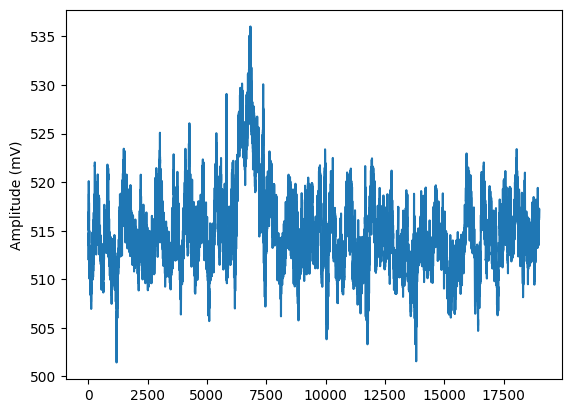

In [49]:
plt.plot( waves["original"][515, :] )
plt.ylabel('Amplitude (mV)') 

Text(0, 0.5, 'Amplitude (mV)')

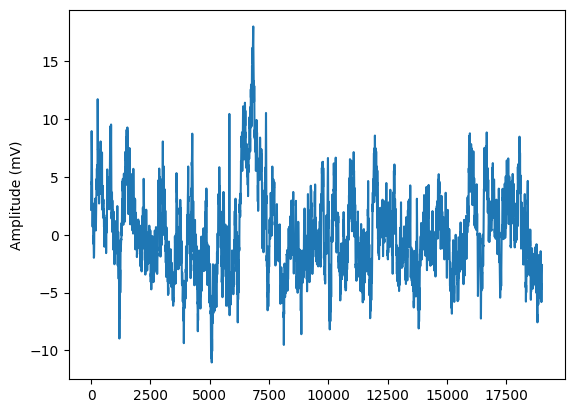

In [50]:
plt.plot( waves["basic"][515, :] )
plt.ylabel('Amplitude (mV)') 


In [ ]:
plt.plot( waves["original"][515, :] )

# <font color="orange">Choose Electrode

In [29]:

def plot_histology_electrode_helper(sd, electrode_mapping, image_path, red_electrodes=[], electrode_color="darkorange", electrodes=True, xlim=(0, 3850), ylim=(0, 2100) ):
    """
    Function: Plots histology image with electrodes and neurons overlaid.
    Inputs: 
        sd (SpikeData object): contains the metadata necessary to plot the neurons and electrodes
        image_path (string): path to histology image
        electrodes (True/False): Whether or not to plot electrodes
        neurons (True/Fasle): Whether or not to plot neurons
        neurons (True/Fasle): Whether or not to plot neurons
        xlim, ylim (tuple): x and y limits of the plot. Defaults to the dimensions of the MEA
    Outputs:
        Displays a plot of the histology image with electrodes and neurons overlaid
    """
                                                
    # Add background image
    plt.figure(figsize=(15,10))       # Set image size to roughly the shape of the MEA
    img = plt.imread(image_path)      # Load in image
    plt.imshow(img,  extent=[0, 3850, 0, 2100]) # Plot image, have it correspond to electrode dimensions

    # Plot electrodes
    if electrodes:        # Get electrode positions from metadata, the plot them
        plt.scatter( electrode_mapping[:,0], electrode_mapping[:,1], s=4, c=electrode_color)

    for electrode_num in red_electrodes:
        plt.scatter( electrode_mapping[electrode_num,0], electrode_mapping[electrode_num,1], s=20, c="red")

    #add legend, axises limits, labels,  and title
    legend_elements = [Patch(facecolor=electrode_color) ]   # Create colors in legend
    plt.legend(legend_elements, ["Electrode"])       # Add legend       
    plt.xlim( xlim[0], xlim[1] )                                       # Set axis limits to that of the MEA
    plt.ylim( ylim[0], ylim[1])
    plt.xlabel('um')                                         # add axises and title
    plt.ylabel('um')
    plt.title(f"Neuron & Electrode Layout")
    plt.show()  

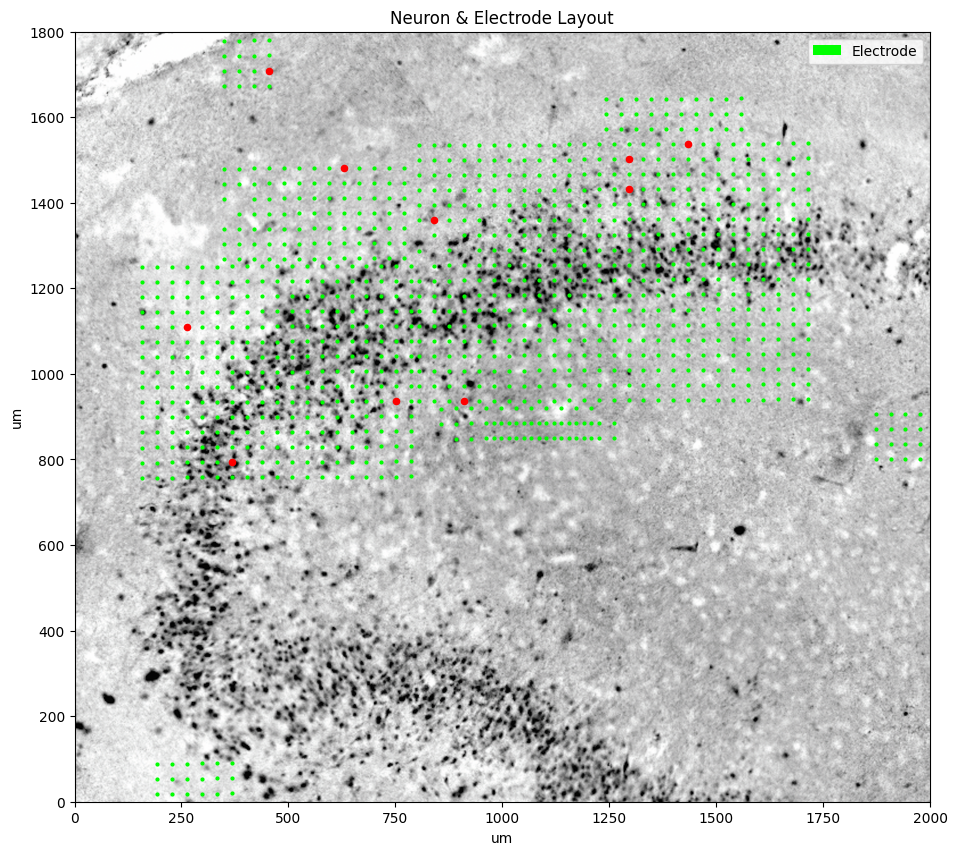

In [48]:
plot_histology_electrode_helper( sd, electrode_mapping,  "/workspaces/human_hippocampus/data/histology/hc112823_bw.png",
                              red_electrodes=  list(range(500,510)),
                              electrode_color="lime", xlim=(0,2000),ylim=(0, 1800)  )

In [30]:
# Find electrodes gephgraphically close to selected electrode
location= electrode_mapping[499,:]

electrodes = []
for i in range(len(electrode_mapping)):
    dist = np.linalg.norm( electrode_mapping[i,:] - location)
    if dist<50:
        electrodes.append(i)
electrodes

[310, 354, 382, 499, 515, 598, 669, 845, 866]

# <font color="red">Old

In [25]:
# plot_histology_electrode_helper( sd, electrode_mapping,  "/workspaces/human_hippocampus/data/histology/hc112823_bw.png",
#                               red_electrodes=  [515, 19, 658], #377], #list(range(630,631)) ,
#                               electrode_color="lime", xlim=(0,2000),ylim=(0, 1800)  )

In [61]:
# plot_histology_electrode_helper( sd, electrode_mapping,  "/workspaces/human_hippocampus/data/histology/hc112823_bw.png",
#                               red_electrodes=  [499, 19, 658], #list(range(630,631)) ,
#                               electrode_color="lime", xlim=(0,2000),ylim=(0, 1800)  )

In [62]:
# plot_histology_electrode_helper( sd, electrode_mapping,  "/workspaces/human_hippocampus/data/histology/hc112823_bw.png",
#                               red_electrodes=  [515, 19, 658], #list(range(630,631)) ,
#                               electrode_color="lime", xlim=(0,2000),ylim=(0, 1800)  )

In [63]:
# plot_histology_electrode_helper( sd, electrode_mapping,  "/workspaces/human_hippocampus/data/histology/hc112823_bw.png",
#                               red_electrodes=  [138, 19, 658], #list(range(630,631)) ,
#                               electrode_color="lime", xlim=(0,2000),ylim=(0, 1800)  )

In [64]:
# plot_histology_electrode_helper( sd, electrode_mapping,  "/workspaces/human_hippocampus/data/histology/hc112823_bw.png",
#                               red_electrodes=  [410, 19, 658], #list(range(630,631)) ,
#                               electrode_color="lime", xlim=(0,2000),ylim=(0, 1800)  )

In [65]:
# plot_histology_electrode_helper( sd, electrode_mapping,  "/workspaces/human_hippocampus/data/histology/hc112823_bw.png",
#                               red_electrodes=  [515, 19, 658], #list(range(630,631)) ,
#                               electrode_color="lime", xlim=(0,2000),ylim=(0, 1800)  )